# Testing different conditions for regression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from re import sub
from decimal import Decimal
from matplotlib import pyplot as plt
import datetime
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk import word_tokenize, WordNetLemmatizer
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Imputer, StandardScaler
from sklearn.decomposition import PCA
from math import sqrt
import tests as t
import re
import nltk
from sklearn.preprocessing import OneHotEncoder
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import SGDRegressor
import folium
from sklearn.pipeline import Pipeline
from sklearn import linear_model

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import xgboost as xgb
pd.set_option('display.max_columns', 106)
from sklearn.metrics import mean_squared_error, mean_absolute_error

import collections
from sklearn import metrics
from sklearn import datasets
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from collections import Counter
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from collections import Counter

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sousa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sousa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sousa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
porto = pd.read_csv(r"C:\Users\sousa\Desktop\github\Airbnb Tale of 2 cities\Data Portugal\porto_listings.csv")
lisbon = pd.read_csv(r"C:\Users\sousa\Desktop\github\Airbnb Tale of 2 cities\Data Portugal\lisbon_listings.csv")

In [3]:
porto.describe()

,Unnamed: 0,id,transit,host_id,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,is_location_exact,room_type,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,has_availability,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,host_name_present,last_review_present,first_review_present,host_since_present,reviews_p_month_present,amenities_count,neighbourhood_cleansed_Agrela,neighbourhood_cleansed_Aguiar de Sousa,neighbourhood_cleansed_Aguçadoura e Navais,"neighbourhood_cleansed_Aldoar, Foz do Douro e Nevogilde",neighbourhood_cleansed_Alfena,neighbourhood_cleansed_Alvarelhos e Guidões,...,neighbourhood_cleansed_Muro,neighbourhood_cleansed_Negrelos (São Tomé),neighbourhood_cleansed_Nogueira do Cravo e Pindelo,neighbourhood_cleansed_Nogueira e Silva Escura,"neighbourhood_cleansed_O. Azeméis, Riba-Ul, Ul, Macinhata da Seixa, Madail",neighbourhood_cleansed_Oliveira do Douro,neighbourhood_cleansed_Ossela,neighbourhood_cleansed_Parada de Todeia,neighbourhood_cleansed_Paranhos,neighbourhood_cleansed_Paredes,neighbourhood_cleansed_Pedroso e Seixezelo,neighbourhood_cleansed_Pedrouços,"neighbourhood_cleansed_Perafita, Lavra e Santa Cruz do Bispo","neighbourhood_cleansed_Pinheiro da Bemposta, Travanca e Palmaz","neighbourhood_cleansed_Póvoa de Varzim, Beiriz e Argivai",neighbourhood_cleansed_Ramalde,neighbourhood_cleansed_Rates,neighbourhood_cleansed_Rebordosa,neighbourhood_cleansed_Reguenga,neighbourhood_cleansed_Retorta e Tougues,neighbourhood_cleansed_Rio Mau e Arcos,neighbourhood_cleansed_Rio Tinto,neighbourhood_cleansed_Roge,neighbourhood_cleansed_Romariz,"neighbourhood_cleansed_Sandim, Olival, Lever e Crestuma",neighbourhood_cleansed_Sanguedo,"neighbourhood_cleansed_Santa Maria da Feira, Travanca, Sanfins e Espargo",neighbourhood_cleansed_Santa Marinha e São Pedro da Afurada,neighbourhood_cleansed_Serzedo e Perosinho,neighbourhood_cleansed_Silvalde,neighbourhood_cleansed_Sobreira,"neighbourhood_cleansed_St. Tirso, Couto (S. Cristina e S. Miguel) e Burgães",neighbourhood_cleansed_São Félix da Marinha,neighbourhood_cleansed_São João da Madeira,neighbourhood_cleansed_São João de Ver,neighbourhood_cleansed_São Mamede de Infesta e Senhora da Hora,neighbourhood_cleansed_São Pedro Fins,neighbourhood_cleansed_São Pedro de Castelões,neighbourhood_cleansed_Tropeço,neighbourhood_cleansed_Urrô,neighbourhood_cleansed_Valongo,neighbourhood_cleansed_Vila Chã,neighbourhood_cleansed_Vila Nova da Telha,neighbourhood_cleansed_Vila do Conde,neighbourhood_cleansed_Vilar de Andorinho,neighbourhood_cleansed_Vilar de Pinheiro,neighbourhood_cleansed_Vilar e Mosteiró,neighbourhood_cleansed_Água Longa,neighbourhood_cleansed_Águas Santas,neighbourhood_cleansed_Árvore,time_in_operation,time_2_first_review,host_in_pt
count,7662.000000,7.662000e+03,7662.000000,7.662000e+03,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.0,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.0,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.0,7662.0,7662.0,7662.0,7662.0,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,...,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7

In [4]:
lisbon.describe()

,Unnamed: 0,id,transit,host_id,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,is_location_exact,room_type,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,has_availability,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,host_name_present,last_review_present,first_review_present,host_since_present,reviews_p_month_present,amenities_count,neighbourhood_cleansed_Abrigada e Cabanas de Torres,neighbourhood_cleansed_Agualva e Mira-Sintra,neighbourhood_cleansed_Ajuda,neighbourhood_cleansed_Alcabideche,neighbourhood_cleansed_Alcntara,neighbourhood_cleansed_Alcoentre,...,neighbourhood_cleansed_Misericrdia,neighbourhood_cleansed_Moscavide e Portela,neighbourhood_cleansed_Odivelas,"neighbourhood_cleansed_Oeiras e S.Julio da Barra, Pao de Arcos e Caxias",neighbourhood_cleansed_Olhalvo,neighbourhood_cleansed_Olivais,neighbourhood_cleansed_Parque das Naes,neighbourhood_cleansed_Penha de Frana,neighbourhood_cleansed_Peral,neighbourhood_cleansed_Pontinha e Fames,neighbourhood_cleansed_Porto Salvo,neighbourhood_cleansed_Pvoa de Santa Iria e Forte da Casa,neighbourhood_cleansed_Pvoa de Santo Adrio e Olival de Basto,neighbourhood_cleansed_Queluz e Belas,neighbourhood_cleansed_Ramada e Caneas,neighbourhood_cleansed_Ramalhal,neighbourhood_cleansed_Reguengo Grande,neighbourhood_cleansed_Ribafria e Pereiro de Palhacana,neighbourhood_cleansed_Ribamar,neighbourhood_cleansed_Rio de Mouro,"neighbourhood_cleansed_S.Maria, S.Miguel, S.Martinho, S.Pedro Penaferrim","neighbourhood_cleansed_S.Pedro e Santiago, S.Maria e S.Miguel, e Mataces",neighbourhood_cleansed_Sacavm e Prior Velho,neighbourhood_cleansed_Santa Brbara,neighbourhood_cleansed_Santa Clara,"neighbourhood_cleansed_Santa Iria de Azoia, So Joo da Talha e Bobadela",neighbourhood_cleansed_Santa Maria Maior,neighbourhood_cleansed_Santo Antnio,neighbourhood_cleansed_Santo Antnio dos Cavaleiros e Frielas,neighbourhood_cleansed_Santo Isidoro,neighbourhood_cleansed_Santo Quintino,neighbourhood_cleansed_Sapataria,neighbourhood_cleansed_Silveira,neighbourhood_cleansed_So Bartolomeu dos Galegos e Moledo,neighbourhood_cleansed_So Domingos de Benfica,neighbourhood_cleansed_So Domingos de Rana,neighbourhood_cleansed_So Joo das Lampas e Terrugem,neighbourhood_cleansed_So Pedro da Cadeira,neighbourhood_cleansed_So Vicente,neighbourhood_cleansed_Sobral de Monte Agrao,neighbourhood_cleansed_Turcifal,neighbourhood_cleansed_Vale do Paraso,neighbourhood_cleansed_Venda do Pinheiro e Santo Estvo das Gals,neighbourhood_cleansed_Venteira,neighbourhood_cleansed_Ventosa,neighbourhood_cleansed_Vermelha,neighbourhood_cleansed_Vialonga,neighbourhood_cleansed_Vila Franca de Xira,neighbourhood_cleansed_Vimeiro,neighbourhood_cleansed_guas Livres,time_in_operation,time_2_first_review,host_in_pt
count,16329.000000,1.632900e+04,16329.000000,1.632900e+04,16329.000000,16329.000000,16329.000000,16329.000000,16329.000000,16329.000000,16329.000000,16329.000000,16329.000000,16329.000000,16329.000000,16329.000000,16329.000000,16329.000000,16329.000000,16329.000000,16329.000000,16329.000000,16329.000000,16329.000000,16329.0,16329.000000,16329.000000,16329.000000,16329.000000,16329.000000,16329.000000,16329.000000,16329.000000,16329.000000,16329.000000,16329.0,16329.000000,16329.000000,16329.000000,16329.000000,16329.000000,16329.0,16329.0,16329.0,16329.0,16329.0,16329.000000,16329.000000,16329.000000,16329.000000,16329.000000,16329.000000,16329.000000,...,16329.000000,16329.00000,16329.000000,16329.000000,16329.000000,16329.000000,16329.000000,16329.000000,16329.000

In [5]:
#function to scale and normalize the dataframes features
def feature_scaling(df, type_scale):
    '''
    This function takes in either the azdias or the customers dataframe and applyes the selected feature scaler
    Args: customer or azdias dataframe and a string representing the type of scaling intended
    returns: scaled dataframe
    '''
    
    features_list = df.columns
    
    if type_scale == 'StandardScaler':
        df_scaled = StandardScaler().fit_transform(df)
        
    if type_scale == 'MinMaxScaler':
        df_scaled = MinMaxScaler().fit_transform(df)
    
    df_scaled = pd.DataFrame(df_scaled)
    df_scaled.columns = features_list
    
    return df_scaled

In [6]:
#pca model
def pca_model(df, n_components):
    '''
    This function defines a model that takes in a previously scaled dataframe and returns the result of 
    the transformation. The output is an onject created post data fitting
    '''
    pca = PCA(n_components)
    pca_df = pca.fit(df)
    
    return pca_df

In [7]:
import matplotlib.pyplot as plt
from pylab import *
#scree plots for PCA
def scree_plots(SS1,SS2, dataname1, dataname2):
    '''
    This function takes in the transformed data using PCA and plots it in scree plots
    '''
    subplot(2,1,1)

    plt.plot(np.cumsum(SS1.explained_variance_ratio_))
    plt.xlabel('Number of Components')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Explained Variance Ratio vs Number of Components SS' + dataname1)
    plt.grid(b=True)

    subplot(2,1,2)
    plt.plot(np.cumsum(SS2.explained_variance_ratio_))
    plt.xlabel('Number of Components')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Explained Variance Ratio vs Number of Components SS' + dataname2)
    plt.grid(b=True)

    plot = tight_layout()
    plot = plt.show()

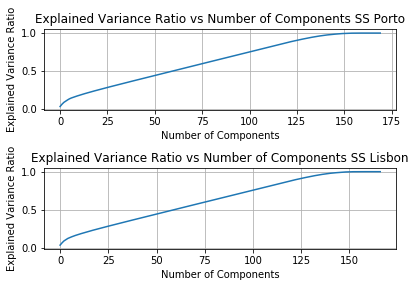

In [8]:
porto_SS = feature_scaling(porto, 'StandardScaler')
lisbon_SS = feature_scaling(lisbon, 'StandardScaler')

n_components_porto = len(porto_SS.columns.values)
n_components_lisbon = len(lisbon_SS.columns.values)

porto_SS_pca = pca_model(porto_SS, n_components_porto)
lisbon_SS_pca = pca_model(lisbon_SS, n_components_lisbon)

scree_plots(porto_SS_pca, lisbon_SS_pca, ' Porto', ' Lisbon')

Using standard scaler with 150 principal components 90% of the original variance can be represented


In [9]:
X_porto = porto.drop('price', 1)
y_porto = porto['price']

X_lisbon = lisbon.drop('price', 1)
y_lisbon = lisbon['price']

In [10]:
# split our data
X_porto_train, X_porto_test, y_porto_train, y_porto_test = train_test_split(X_porto, y_porto, test_size=0.33)

X_lisbon_train, X_lisbon_test, y_lisbon_train, y_lisbon_test = train_test_split(X_lisbon, y_lisbon, test_size=0.33)

### Linear Regression with no scaling, scalling, with pca and without pca

In [11]:
#no scaling and no dimensionality reduction
no_scale_no_pca = Pipeline([('linear', linear_model.LinearRegression())])
no_scale_no_pca.fit(X_porto_train, y_porto_train)
y_pred1_porto = no_scale_no_pca.predict(X_porto_test)
linear_reg_err1_porto = metrics.median_absolute_error(y_porto_test, y_pred1_porto)
linear_reg_r21_porto = metrics.r2_score(y_porto_test, y_pred1_porto)


#with scaling, no dimensionality reduction
scale_no_pca = Pipeline([('standardize', StandardScaler()), ('linear', linear_model.LinearRegression())])
scale_no_pca.fit(X_porto_train, y_porto_train)
y_pred2_porto = scale_no_pca.predict(X_porto_test)
linear_reg_err2_porto = metrics.median_absolute_error(y_porto_test, y_pred2_porto)
linear_reg_r22_porto = metrics.r2_score(y_porto_test, y_pred2_porto)

    
#scaling and dimensionality reduction
scale_pca = Pipeline([('standardize', StandardScaler()),
    ('pca', PCA(n_components = 125)), ('linear', linear_model.LinearRegression())])
scale_pca.fit(X_porto_train, y_porto_train)
y_pred3_porto = scale_pca.predict(X_porto_test)
linear_reg_err3_porto = metrics.median_absolute_error(y_porto_test, y_pred3_porto)
linear_reg_r23_porto = metrics.r2_score(y_porto_test, y_pred3_porto)


print ("Linear Regression's MAE without PCA or scaling in Porto: " + str(linear_reg_err1_porto))
print ("Linear Regression's MAE deviation with scaling in Porto: " + str(linear_reg_err2_porto))
print ("Linear Regression's MAE deviation with PCA and scaling in Porto: " + str(linear_reg_err3_porto))

print ("Linear Regression's r2 without PCA or scaling in Porto: " + str(linear_reg_r21_porto))
print ("Linear Regression's r2 deviation with scaling in Porto: " + str(linear_reg_r22_porto))
print ("Linear Regression's r2 deviation with PCA and scaling in Porto: " + str(linear_reg_r23_porto))


Linear Regression's MAE without PCA or scaling in Porto: 15.375543293394003
Linear Regression's MAE deviation with scaling in Porto: 15.379804528028671
Linear Regression's MAE deviation with PCA and scaling in Porto: 15.581494563895461
Linear Regression's r2 without PCA or scaling in Porto: 0.3444433194102767
Linear Regression's r2 deviation with scaling in Porto: -4.004412649261989e+19
Linear Regression's r2 deviation with PCA and scaling in Porto: 0.4347274117187987


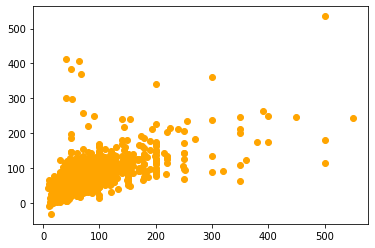

In [12]:
plt.scatter(y_porto_test, y_pred1_porto, c = 'orange')

In [13]:
#no scaling and no dimensionality regression
no_scale_no_pca = Pipeline([('linear', linear_model.LinearRegression())])
no_scale_no_pca.fit(X_lisbon_train, y_lisbon_train)
y_pred1_lisbon = no_scale_no_pca.predict(X_lisbon_test)
linear_reg_err1_lisbon = metrics.median_absolute_error(y_lisbon_test, y_pred1_lisbon)
linear_reg_r21_lisbon = metrics.r2_score(y_lisbon_test, y_pred1_lisbon)


#with scaling, no dimensionality regression
scale_no_pca = Pipeline([('standardize', StandardScaler()), ('linear', linear_model.LinearRegression())])
scale_no_pca.fit(X_lisbon_train, y_lisbon_train)
y_pred2_lisbon = scale_no_pca.predict(X_lisbon_test)
linear_reg_err2_lisbon = metrics.median_absolute_error(y_lisbon_test, y_pred2_lisbon)
linear_reg_r22_lisbon = metrics.r2_score(y_lisbon_test, y_pred2_lisbon)

    
#scaling and dimensionality reduction
scale_pca = Pipeline([('standardize', StandardScaler()),
    ('pca', PCA(n_components = 125)), ('linear', linear_model.LinearRegression())])
scale_pca.fit(X_lisbon_train, y_lisbon_train)
y_pred3_lisbon = scale_pca.predict(X_lisbon_test)
linear_reg_err3_lisbon = metrics.median_absolute_error(y_lisbon_test, y_pred3_lisbon)
linear_reg_r23_lisbon = metrics.r2_score(y_lisbon_test, y_pred3_lisbon)


print ("Linear Regression's MAE without PCA or scaling in Lisbon: " + str(linear_reg_err1_lisbon))
print ("Linear Regression's MAE deviation with scaling in Lisbon: " + str(linear_reg_err2_lisbon))
print ("Linear Regression's MAE deviation with PCA and scaling in Lisbon: " + str(linear_reg_err3_lisbon))
print ("Linear Regression's r2 without PCA or scaling in Lisbon: " + str(linear_reg_r21_lisbon))
print ("Linear Regression's r2 deviation with scaling in Lisbon: " + str(linear_reg_r22_lisbon))
print ("Linear Regression's r2 deviation with PCA and scaling in Lisbon: " + str(linear_reg_r23_lisbon))

Linear Regression's MAE without PCA or scaling in Lisbon: 20.12091526700806
Linear Regression's MAE deviation with scaling in Lisbon: 20.096991706190366
Linear Regression's MAE deviation with PCA and scaling in Lisbon: 20.205306193179908
Linear Regression's r2 without PCA or scaling in Lisbon: 0.4986298543404276
Linear Regression's r2 deviation with scaling in Lisbon: -7.700805602093949e+19
Linear Regression's r2 deviation with PCA and scaling in Lisbon: 0.39504321463850023


## Xgboost Regressor no scaling

In [14]:
booster = xgb.XGBRegressor()

param_grid = {'n_estimators': [100, 200, 300],
              'learning_rate': [0.01, 0.05, 0.1], 
              'max_depth': [3, 4, 5, 6, 7],
              'colsample_bytree': [0.6, 0.7, 1],
              'gamma': [0.0, 0.1, 0.2]}

booster_grid_search = GridSearchCV(booster, param_grid, cv=3, n_jobs=-1)

In [15]:
# train the tuned random forest porto
booster_grid_search.fit(X_porto_train, y_porto_train)

print(booster_grid_search.best_params_)

[11:06:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'colsample_bytree': 0.7, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}


In [16]:
# train the tuned random forest lisbon
booster_grid_search.fit(X_lisbon_train, y_lisbon_train)

print(booster_grid_search.best_params_)

[12:20:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'colsample_bytree': 0.7, 'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 300}


In [17]:
#instantiating the models based on the hyperparameters found by grid search
booster_porto = xgb.XGBRegressor(colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, 
                           max_depth=3, n_estimators=300, random_state=4)

booster_lisbon = xgb.XGBRegressor(colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, 
                           max_depth=6, n_estimators=300, random_state=4)

In [18]:
#training
booster_porto.fit(X_porto_train, y_porto_train)

booster_lisbon.fit(X_lisbon_train, y_lisbon_train)

[13:20:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:20:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.2,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=None, n_estimators=300,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=4,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [19]:
#prediction
y_pred_train_porto = booster_porto.predict(X_porto_train)
y_pred_test_porto = booster_porto.predict(X_porto_test)

y_pred_train_lisbon = booster_lisbon.predict(X_lisbon_train)
y_pred_test_lisbon = booster_lisbon.predict(X_lisbon_test)

In [20]:
#metrics to determine quality of model
RMSE_porto = np.sqrt(mean_squared_error(y_porto_test, y_pred_test_porto))
RMSE_lisbon = np.sqrt(mean_squared_error(y_lisbon_test, y_pred_test_lisbon))

MSE_porto = mean_squared_error(y_porto_test, y_pred_test_porto)
MSE_lisbon = mean_squared_error(y_lisbon_test, y_pred_test_lisbon)

r2_porto = r2_score(y_porto_test, y_pred_test_porto)
r2_lisbon = r2_score(y_lisbon_test, y_pred_test_lisbon)



print(f"RMSE_porto: {round(RMSE_porto, 4)}")
print(f"RMSE_lisbon: {round(RMSE_lisbon, 4)}")

print(f"MSE_porto: {round(MSE_porto, 4)}")
print(f"MSE_lisbon: {round(MSE_lisbon, 4)}")

print(f"r2_porto: {round(r2_porto, 4)}")
print(f"r2_lisbon: {round(r2_lisbon, 4)}")

RMSE_porto: 30.2851
RMSE_lisbon: 34.1963
MSE_porto: 917.1882
MSE_lisbon: 1169.3852
r2_porto: 0.5785
r2_lisbon: 0.6888


## XGboost with scaling

In [ ]:
X_porto_SS = porto_SS.drop('price', 1)
y_porto_SS = porto_SS['price']

X_lisbon_SS = lisbon_SS.drop('price', 1)
y_lisbon_SS = lisbon_SS['price']

In [ ]:
# split our data
X_porto_train, X_porto_test, y_porto_train, y_porto_test = train_test_split(X_porto_SS, y_porto_SS, test_size=0.2)

X_lisbon_train, X_lisbon_test, y_lisbon_train, y_lisbon_test = train_test_split(X_lisbon_SS, y_lisbon_SS, test_size=0.2)

In [ ]:
booster = xgb.XGBRegressor()

param_grid = {'n_estimators': [100, 200, 300],
              'learning_rate': [0.01, 0.05, 0.1], 
              'max_depth': [3, 4, 5, 6, 7],
              'colsample_bytree': [0.6, 0.7, 1],
              'gamma': [0.0, 0.1, 0.2]}

booster_grid_search = GridSearchCV(booster, param_grid, cv=3, n_jobs=-1)

In [ ]:
# train the tuned random forest porto
booster_grid_search.fit(X_porto_train, y_porto_train)

print(booster_grid_search.best_params_)

In [ ]:
# train the tuned random forest lisbon
booster_grid_search.fit(X_lisbon_train, y_lisbon_train)

print(booster_grid_search.best_params_)

In [ ]:
#instantiating the models based on the hyperparameters found by grid search
booster_porto = xgb.XGBRegressor(colsample_bytree = 1, gamma = 0.0, learning_rate = 0.1, 
                           max_depth= 3, n_estimators = 300, random_state = 4)

booster_lisbon = xgb.XGBRegressor(colsample_bytree = 1, gamma = 0.0, learning_rate = 0.05, 
                           max_depth = 4, n_estimators = 300, random_state = 4)

In [ ]:
#training
booster_porto.fit(X_porto_train, y_porto_train)

booster_lisbon.fit(X_lisbon_train, y_lisbon_train)

In [ ]:
#prediction
y_pred_train_porto = booster_porto.predict(X_porto_train)
y_pred_test_porto = booster_porto.predict(X_porto_test)

y_pred_train_lisbon = booster_lisbon.predict(X_lisbon_train)
y_pred_test_lisbon = booster_lisbon.predict(X_lisbon_test)

In [ ]:
#metrics to determine quality of model
RMSE_porto = np.sqrt(mean_squared_error(y_porto_test, y_pred_test_porto))
RMSE_lisbon = np.sqrt(mean_squared_error(y_lisbon_test, y_pred_test_lisbon))

MSE_porto = mean_squared_error(y_porto_test, y_pred_test_porto)
MSE_lisbon = mean_squared_error(y_lisbon_test, y_pred_test_lisbon)

r2_porto = r2_score(y_porto_test, y_pred_test_porto)
r2_lisbon = r2_score(y_lisbon_test, y_pred_test_lisbon)



print(f"RMSE_porto: {round(RMSE_porto, 4)}")
print(f"RMSE_lisbon: {round(RMSE_lisbon, 4)}")

print(f"MSE_porto: {round(MSE_porto, 4)}")
print(f"MSE_lisbon: {round(MSE_lisbon, 4)}")

print(f"r2_porto: {round(r2_porto, 4)}")
print(f"r2_lisbon: {round(r2_lisbon, 4)}")

## In the Feature selection notebook I came up with a list of features that could be good candidates for reduced data approach to modeling

## Modeling with Feature selection

In [ ]:
lisbon_list = ['last_review_present',
 'neighbourhood_cleansed_Aldeia Galega da Merceana e Aldeia Gavinha',
 'accommodates',
 'host_name_present',
 'price_per_guest',
 'neighbourhood_cleansed_Arruda dos Vinhos',
 'neighbourhood_cleansed_Cardosas',
 'neighbourhood_cleansed_Arranh',
 'neighbourhood_group_cleansed_Arruda Dos Vinhos',
 'neighbourhood_cleansed_Mina de gua',
 'neighbourhood_cleansed_Falagueira-Venda Nova',
 'neighbourhood_cleansed_Alfragide',
 'neighbourhood_cleansed_Venteira',
 'neighbourhood_group_cleansed_Amadora',
 'neighbourhood_cleansed_guas Livres',
 'neighbourhood_cleansed_Sapataria',
 'neighbourhood_cleansed_Santo Quintino',
 'is_business_travel_ready',
 'neighbourhood_cleansed_Sobral de Monte Agrao',
 'neighbourhood_group_cleansed_Sobral De Monte Agrao',
 'neighbourhood_cleansed_Encosta do Sol',
 'reviews_p_month_present',
 'neighbourhood_cleansed_Alcoentre',
 'neighbourhood_cleansed_Pvoa de Santa Iria e Forte da Casa',
 'neighbourhood_cleansed_Alhandra, So Joo dos Montes e Calhandriz',
 'neighbourhood_group_cleansed_Azambuja',
 'neighbourhood_group_cleansed_Vila Franca De Xira',
 'neighbourhood_cleansed_Castanheira do Ribatejo e Cachoeiras',
 'neighbourhood_cleansed_Manique do Intendente, V.N.de S.Pedro e Maussa',
 'neighbourhood_cleansed_Vialonga',
 'neighbourhood_cleansed_Vila Franca de Xira',
 'neighbourhood_cleansed_Azambuja',
 'neighbourhood_cleansed_Vale do Paraso',
 'neighbourhood_cleansed_Alverca do Ribatejo e Sobralinho']

porto_list = ['reviews_p_month_present',
 'host_since_present',
 'property_type_Windmill',
 'last_review_present',
 'neighbourhood_cleansed_São João de Ver',
 'neighbourhood_cleansed_Campo e Sobrado',
 'price_per_guest',
 'accommodates',
 'first_review_present',
 'has_availability',
 'neighbourhood_cleansed_Roge',
 'neighbourhood_cleansed_São Pedro de Castelões',
 'neighbourhood_cleansed_Cepelos',
 'neighbourhood_cleansed_Caldas de São Jorge e de Pigeiros',
 'neighbourhood_cleansed_Fiães',
 'neighbourhood_cleansed_Romariz',
 'neighbourhood_group_cleansed_SANTA MARIA DA FEIRA',
 'neighbourhood_cleansed_Arões',
 'neighbourhood_cleansed_Macieira de Cambra',
 'neighbourhood_group_cleansed_VALE DE CAMBRA',
 'neighbourhood_group_cleansed_SÃO JOÃO DA MADEIRA',
 'neighbourhood_cleansed_Sanguedo',
 'neighbourhood_cleansed_Santa Maria da Feira, Travanca, Sanfins e Espargo',
 'neighbourhood_cleansed_Lourosa',
 'neighbourhood_cleansed_Lobão, Gião, Louredo e Guisande',
 'neighbourhood_cleansed_São João da Madeira',
 'neighbourhood_cleansed_Canedo, Vale e Vila Maior',
 'neighbourhood_cleansed_Argoncilhe',
 'neighbourhood_cleansed_Bougado (São Martinho e Santiago)',
 'neighbourhood_cleansed_Coronado (São Romão e São Mamede)',
 'neighbourhood_cleansed_Mozelos',
 'neighbourhood_cleansed_Muro',
 'is_business_travel_ready',
 'neighbourhood_cleansed_Alvarelhos e Guidões',
 'neighbourhood_cleansed_Covelas',
 'neighbourhood_group_cleansed_TROFA',
 'neighbourhood_cleansed_Ermesinde',
 'neighbourhood_cleansed_Paredes',
 'neighbourhood_cleansed_Gandra',
 'neighbourhood_cleansed_Alfena',
 'neighbourhood_cleansed_Rebordosa',
 'neighbourhood_cleansed_Cete',
 'neighbourhood_cleansed_Aguiar de Sousa',
 'neighbourhood_group_cleansed_VALONGO',
 'neighbourhood_group_cleansed_PAREDES',
 'neighbourhood_cleansed_Baltar',
 'host_name_present',
 'neighbourhood_cleansed_Valongo',
 'neighbourhood_cleansed_Sobreira',
 'neighbourhood_cleansed_Parada de Todeia']

In [ ]:
X_porto_f = porto[porto_list]
y_porto_f = porto.price.values

X_lisbon_f = lisbon[lisbon_list]
y_lisbon_f = lisbon.price.values

## Lets run the models with the selected features

In [ ]:
# split our data
X_porto_train, X_porto_test, y_porto_train, y_porto_test = train_test_split(X_porto_f, y_porto_f, test_size=0.33)

X_lisbon_train, X_lisbon_test, y_lisbon_train, y_lisbon_test = train_test_split(X_lisbon_f, y_lisbon_f, test_size=0.33)

In [ ]:
#no scaling and no dimensionality reduction
no_scale_no_pca = Pipeline([('linear', linear_model.LinearRegression())])
no_scale_no_pca.fit(X_porto_train, y_porto_train)
y_pred1_porto = no_scale_no_pca.predict(X_porto_test)
linear_reg_err1_porto = metrics.median_absolute_error(y_porto_test, y_pred1_porto)
linear_reg_r21_porto = metrics.r2_score(y_porto_test, y_pred1_porto)


#with scaling, no dimensionality reduction
scale_no_pca = Pipeline([('standardize', StandardScaler()), ('linear', linear_model.LinearRegression())])
scale_no_pca.fit(X_porto_train, y_porto_train)
y_pred2_porto = scale_no_pca.predict(X_porto_test)
linear_reg_err2_porto = metrics.median_absolute_error(y_porto_test, y_pred2_porto)
linear_reg_r22_porto = metrics.r2_score(y_porto_test, y_pred2_porto)

    
#scaling and dimensionality reduction
scale_pca = Pipeline([('standardize', StandardScaler()),
    ('pca', PCA(n_components = 20)), ('linear', linear_model.LinearRegression())])
scale_pca.fit(X_porto_train, y_porto_train)
y_pred3_porto = scale_pca.predict(X_porto_test)
linear_reg_err3_porto = metrics.median_absolute_error(y_porto_test, y_pred3_porto)
linear_reg_r23_porto = metrics.r2_score(y_porto_test, y_pred3_porto)


print ("Linear Regression's MAE without PCA or scaling in Porto: " + str(linear_reg_err1_porto))
print ("Linear Regression's MAE deviation with scaling in Porto: " + str(linear_reg_err2_porto))
print ("Linear Regression's MAE deviation with PCA and scaling in Porto: " + str(linear_reg_err3_porto))

print ("Linear Regression's r2 without PCA or scaling in Porto: " + str(linear_reg_r21_porto))
print ("Linear Regression's r2 deviation with scaling in Porto: " + str(linear_reg_r22_porto))
print ("Linear Regression's r2 deviation with PCA and scaling in Porto: " + str(linear_reg_r23_porto))

In [ ]:
#no scaling and no dimensionality regression
no_scale_no_pca = Pipeline([('linear', linear_model.LinearRegression())])
no_scale_no_pca.fit(X_lisbon_train, y_lisbon_train)
y_pred1_lisbon = no_scale_no_pca.predict(X_lisbon_test)
linear_reg_err1_lisbon = metrics.median_absolute_error(y_lisbon_test, y_pred1_lisbon)
linear_reg_r21_lisbon = metrics.r2_score(y_lisbon_test, y_pred1_lisbon)


#with scaling, no dimensionality regression
scale_no_pca = Pipeline([('standardize', StandardScaler()), ('linear', linear_model.LinearRegression())])
scale_no_pca.fit(X_lisbon_train, y_lisbon_train)
y_pred2_lisbon = scale_no_pca.predict(X_lisbon_test)
linear_reg_err2_lisbon = metrics.median_absolute_error(y_lisbon_test, y_pred2_lisbon)
linear_reg_r22_lisbon = metrics.r2_score(y_lisbon_test, y_pred2_lisbon)

    
#scaling and dimensionality reduction
scale_pca = Pipeline([('standardize', StandardScaler()),
    ('pca', PCA(n_components = 20)), ('linear', linear_model.LinearRegression())])
scale_pca.fit(X_lisbon_train, y_lisbon_train)
y_pred3_lisbon = scale_pca.predict(X_lisbon_test)
linear_reg_err3_lisbon = metrics.median_absolute_error(y_lisbon_test, y_pred3_lisbon)
linear_reg_r23_lisbon = metrics.r2_score(y_lisbon_test, y_pred3_lisbon)


print ("Linear Regression's MAE without PCA or scaling in Lisbon: " + str(linear_reg_err1_lisbon))
print ("Linear Regression's MAE deviation with scaling in Lisbon: " + str(linear_reg_err2_lisbon))
print ("Linear Regression's MAE deviation with PCA and scaling in Lisbon: " + str(linear_reg_err3_lisbon))
print ("Linear Regression's r2 without PCA or scaling in Lisbon: " + str(linear_reg_r21_lisbon))
print ("Linear Regression's r2 deviation with scaling in Lisbon: " + str(linear_reg_r22_lisbon))
print ("Linear Regression's r2 deviation with PCA and scaling in Lisbon: " + str(linear_reg_r23_lisbon))

## Model with conservative approach to dropped and cleaned data